# Elon's affect on the value of Dogecoin

In [48]:
import tweepy as t
import robin_stocks as rh
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import config

In [49]:
# Set up robin_stocks
rh.login(config.user, config.pw)

# Get all Dogecoin historicals using robin_stocks
result = rh.get_crypto_historicals('DOGE', interval='hour', span='3month')
doge_df = pd.DataFrame(result)
float_columns = ['open_price','close_price','high_price','low_price']
doge_df[float_columns] = doge_df[float_columns].astype('float64')
doge_df['begins_at'] = pd.to_datetime(doge_df['begins_at'])
doge_df['ts'] = doge_df.begins_at.values.astype(np.int64) // 10 ** 9
doge_df

,begins_at,open_price,close_price,high_price,low_price,volume,session,interpolated,symbol,ts
0,2020-11-07 01:00:00+00:00,0.002790,0.002809,0.002829,0.002719,0,reg,False,DOGEUSD,1604710800
1,2020-11-07 02:00:00+00:00,0.002819,0.002804,0.002878,0.002769,0,reg,False,DOGEUSD,1604714400
2,2020-11-07 03:00:00+00:00,0.002815,0.002812,0.002877,0.002775,0,reg,False,DOGEUSD,1604718000
3,2020-11-07 04:00:00+00:00,0.002812,0.002801,0.002875,0.002775,0,reg,False,DOGEUSD,1604721600
4,2020-11-07 05:00:00+00:00,0.002813,0.002802,0.002862,0.002764,0,reg,False,DOGEUSD,1604725200
...,...,...,...,...,...,...,...,...,...,...
2203,2021-02-06 20:00:00+00:00,0.053511,0.053931,0.054640,0.050037,0,reg,False,DOGEUSD,1612641600
2204,2021-02-06 21:00:00+00:00,0.054073,0.053877,0.055051,0.052703,0,reg,False,DOGEUSD,1612645200
2205,2021-02-06 22:00:00+00:00,0.053877,0.057164,0.058172,0.052750,0,reg,False,DOGEUSD,1612648800
2206,2021-02-06 23:00:00+00:00,0.056944,0.057451,0.059929,0.054405,0,reg,False,DOGEUSD,1612652400


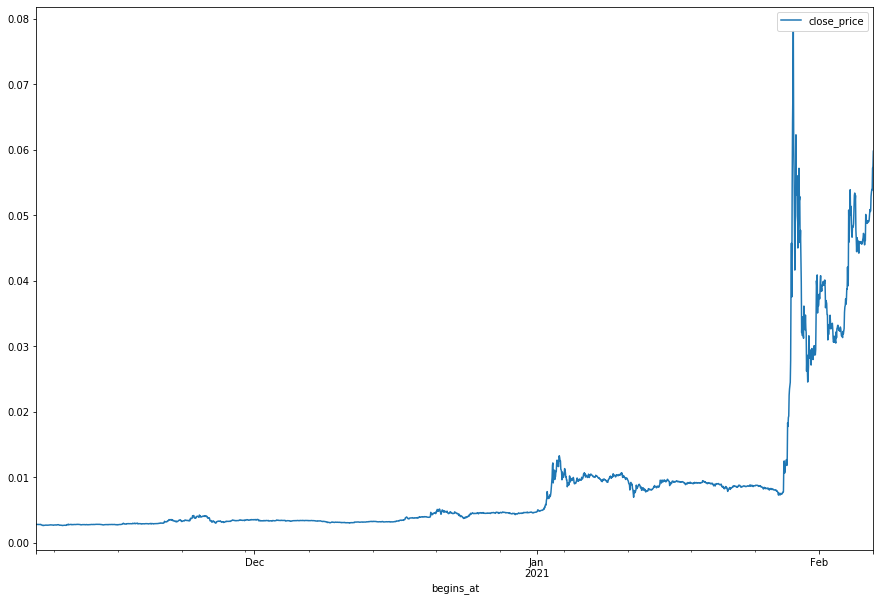

In [50]:
line_df = doge_df[['begins_at', 'close_price']].set_index('begins_at')
line_df.plot.line(figsize=(15,10))

In [51]:
# Set up tweepy auth
auth = t.OAuthHandler(config.api_key, config.secret_key)
auth.set_access_token(config.token, config.token_secret)
api = t.API(auth,wait_on_rate_limit=True)

In [52]:
# Get Elon tweets using tweepy
username = 'elonmusk'
count = 1000
try:     
    # Creation of query method using parameters
    tweets = t.Cursor(api.user_timeline,id=username).items(count)
 
    # Pulling information from tweets iterable object
    tweets_list = [[tweet.created_at, tweet.id, tweet.text] for tweet in tweets]
 
    # Creation of dataframe from tweets list
    # Add or remove columns as you remove tweet information
    tweets_df = pd.DataFrame(tweets_list)
    
except BaseException as e:
    print('failed on_status,',str(e))
    time.sleep(3)

In [54]:
# Limit DF to doge-related tweets
doge_tweets = tweets_df.loc[tweets_df[2].str.lower().str.contains('doge', regex=False)]
doge_tweets

,0,1,2
8,2021-02-06 08:42:25,1357972904663687173,@grimezsz dogecake
38,2021-02-04 08:27:10,1357244295091208193,"no highs, no lows, only doge"
40,2021-02-04 08:15:26,1357241340313141249,dogecoin is the people’s crypto
43,2021-02-04 07:35:35,1357231313376456708,doge
388,2020-12-20 09:30:04,1340590280848908288,one word: doge
604,2020-11-17 18:45:21,1328771222822400001,@reflexfunds @nickidk4 @pcgamer dojo/doge


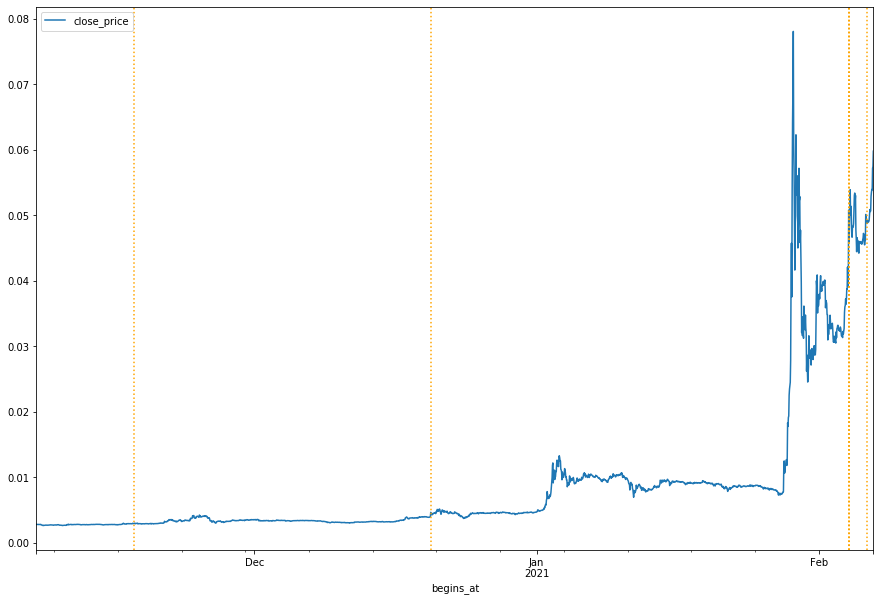

In [56]:
# Plot doge value with Elon tweets as vertical lines
line_df = doge_df[['begins_at', 'close_price']].set_index('begins_at')
line_df.plot.line(figsize=(15,10))

x_value = doge_tweets[0].to_list()
for xp in x_value:
    plt.axvline(x=xp, color='orange', linestyle=':')